<a href="https://colab.research.google.com/github/karem19/Data-Analysis/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gdown
import pandas as pd 
import numpy as np 
import gdown
import os 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import zipfile
import matplotlib.pyplot as plt

In [3]:
url = 'https://drive.google.com/uc?export=download&id=1OOaRdG9L3hjT8OFZRRIBcOHFkk3soaLZ'
output= 'data.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1OOaRdG9L3hjT8OFZRRIBcOHFkk3soaLZ
To: /content/data.zip
851MB [00:09, 89.2MB/s]


'data.zip'

In [4]:
with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall("")

In [5]:
ts= pd.read_csv('/content/resampled_current/5bc90cb9f9af8b0d7fe77cff.csv',usecols=['signals'])

In [6]:
ts.dropna(inplace=True)

In [7]:
arr= np.trim_zeros(np.array(ts['signals']))

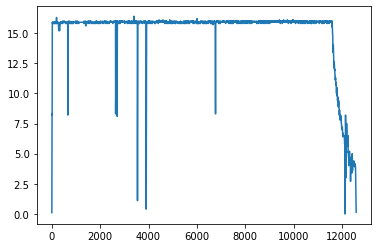

In [8]:
plt.plot(arr)

In [ ]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
timeseries_data = arr
# choose a number of time steps
n_steps = 100
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [ ]:
X.shape, y.shape

((12486, 100), (12486,))

In [ ]:
X = X.reshape((X.shape[0], X.shape[1], 1))


In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
391/391 [==============================] - 174s 434ms/step - loss: 78392.1562
Epoch 2/300
391/391 [==============================] - 169s 432ms/step - loss: 281.1916
Epoch 3/300
391/391 [==============================] - 170s 433ms/step - loss: 277.0186
Epoch 4/300
391/391 [==============================] - 171s 437ms/step - loss: 58.9437
Epoch 5/300
391/391 [==============================] - 171s 437ms/step - loss: 4602467328.0000
Epoch 6/300
391/391 [==============================] - 167s 428ms/step - loss: 189.4028
Epoch 7/300
391/391 [==============================] - 168s 431ms/step - loss: 188.7376
Epoch 8/300
391/391 [==============================] - 168s 430ms/step - loss: 187.9172
Epoch 9/300
391/391 [==============================] - 167s 428ms/step - loss: 186.9076
Epoch 10/300
391/391 [==============================] - 168s 428ms/step - loss: 188.4276
Epoch 11/300
391/391 [==============================] - 166s 426ms/step - loss: 184.0089
Epoch 12/300
391/391 [

KeyboardInterrupt: ignored

In [ ]:
arr[500:503]

array([15.9, 15.9, 15.9])

In [ ]:
x_input= arr[:100]
x_input = x_input.reshape((1, 100, 1))
yhat = model.predict(x_input, verbose=0)

In [ ]:
yhat[0][0]

15.519862

In [ ]:
from tqdm import tqdm
pred= []
for i in tqdm(range(arr.shape[0]-100)):
  x_input= arr[i:i+100]
  x_input = x_input.reshape((1, 100, 1))
  yhat = model.predict(x_input, verbose=0)
  pred.append(yhat[0][0])

100%|██████████| 12486/12486 [16:49<00:00, 12.37it/s]


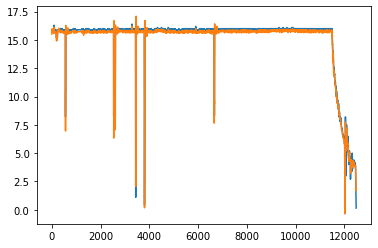

In [ ]:
import matplotlib.pyplot as plt
plt.plot(arr[100:])
plt.plot(pred)
plt.show()

In [ ]:
list= []
for file in os.listdir('/content/resampled_current/'): 
  ts= pd.read_csv('/content/resampled_current/5bc90cb9f9af8b0d7fe77cd5.csv',usecols=['signals'])

['5bc940b4f9af8b0dc677de6f.csv',
 '5d59eda5f9af8b5476889b24.csv',
 '5dba2b1df9af8b58a41a5f7a.csv',
 '5c98211ff9af8b4c40af6b98.csv',
 '5bc90cb9f9af8b0d7fe77d09.csv',
 '5dddd19ff9af8b0c3a16bf63.csv',
 '5bc93906f9af8b0dc677d707.csv',
 '5be2fb55f9af8b2b0edf9ee1.csv',
 '5d3cec9af9af8b77d5556af0.csv',
 '5d8c06a3f9af8b21324108b5.csv',
 '5bc92186f9af8b0dc677c0de.csv',
 '5bc9366bf9af8b0dc677d46f.csv',
 '5c2e8a63f9af8b13dab079fe.csv',
 '5c2e8b80f9af8b13dab07b51.csv',
 '5be30031f9af8b2b0edfa48e.csv',
 '5bc917d0f9af8b0dc677b8d3.csv',
 '5be2fc7bf9af8b2b0edfa06d.csv',
 '5bc93a46f9af8b0dc677d826.csv',
 '5cd4c621f9af8b748c466329.csv',
 '5ce5e99ff9af8b325aae4be0.csv',
 '5be2ffcbf9af8b2b0edfa434.csv',
 '5e26541ef9af8b67acde4c7a.csv',
 '5bc93df3f9af8b0dc677dbfd.csv',
 '5bc923c7f9af8b0dc677c2e1.csv',
 '5cf1c724f9af8b797109130b.csv',
 '5c75e81ef9af8b73772683e0.csv',
 '5e658e77f9af8b2865a5f50e.csv',
 '5d4232a1f9af8b089ecf8054.csv',
 '5c2e858ef9af8b13dab0750e.csv',
 '5ca7f325f9af8b7e082a4aaa.csv',
 '5d1019a2